In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import seaborn
from scipy.optimize import curve_fit, minimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#set up mean for all distributions
mu = 150

#set up seed and distribution sizes to use for each distribution.
np.random.seed(99)

dist_size = (np.random.rand(100) * 2000).astype(int)


# Normal Distribution

Text(0.5,1,'Normal (Gaussian) Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


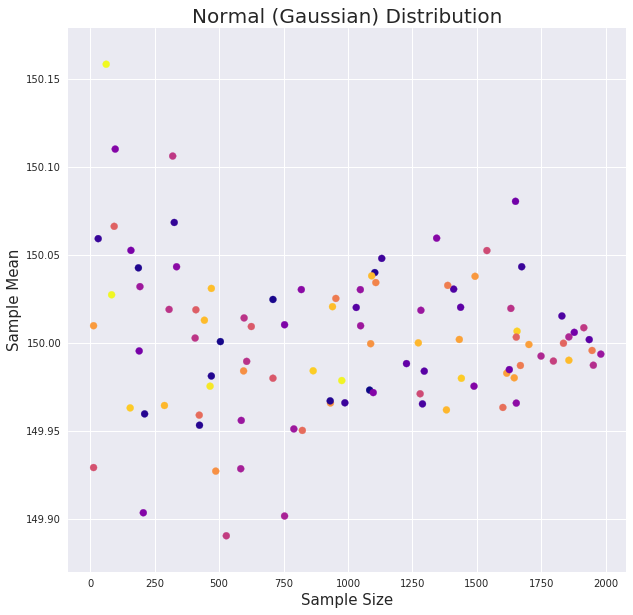

In [3]:
normal_means = np.zeros(shape=(100,))

for i in range(len(dist_size)):
    sample_dist = np.random.normal(mu, size = dist_size[i])
    sample_mean = sample_dist.mean()
    normal_means[i] = sample_mean


    
normal_plot = pl.figure(figsize=(10,10)).add_subplot(111)
normal_plot.scatter(dist_size, normal_means, c = np.random.rand(100), cmap = 'plasma') 
normal_plot.set_xlabel("Sample Size", fontsize=15)
normal_plot.set_ylabel("Sample Mean", fontsize=15)
normal_plot.set_title("Normal (Gaussian) Distribution", fontsize=20)

# Figure 1

In the figure above, there is a general trend among the means towards the target mean of 150. As we can see, the fluctuation of the means becomes less as our sample size becomes larger. 

This follows the Central Limit Theorem, which states that as the distribution size increases, the distribution should begin to resemble a normal distribution. In this case, that is evident by the fact that the variation of means is becoming noticeably smaller (and trending towards 150) as the sample sizes become larger. 

# Poisson Distribution

Text(0.5,1,'Poisson Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


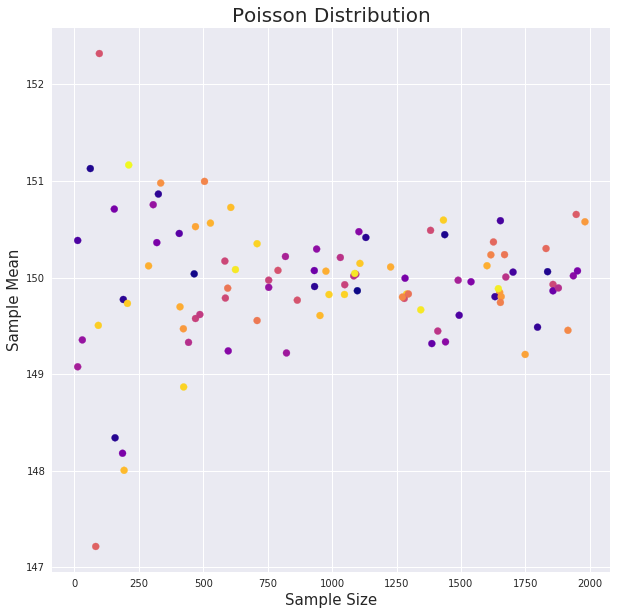

In [4]:
poisson_means = np.zeros(shape=(100,))

for i in range(len(dist_size)):
    sample_dist = np.random.poisson(mu, size = dist_size[i])
    sample_mean = sample_dist.mean()
    poisson_means[i] = sample_mean


    
poisson_plot = pl.figure(figsize=(10,10)).add_subplot(111)
poisson_plot.scatter(dist_size, poisson_means, c = np.random.rand(100), cmap = 'plasma')
poisson_plot.set_xlabel("Sample Size", fontsize = 15)
poisson_plot.set_ylabel("Sample Mean", fontsize = 15)
poisson_plot.set_title("Poisson Distribution", fontsize = 20)

# Figure 2

In the figure above, there is a general trend among the means towards the target mean of 150. As we can see, the fluctuation of the means becomes less as our sample size becomes larger. Unlike the Gaussian distribution above, there is a larger variance among the means, going as high as 152 and lower than 148. This can be attributed to the Poisson distribution's variance being equal to the mean.


This follows the Central Limit Theorem, which states that as the distribution size increases, the distribution should begin to resemble a normal distribution. In this case, that is evident by the fact that the variation of means is becoming noticeably smaller (and trending towards 150) as the sample sizes become larger. 


# Binomial Distribution

Text(0.5,1,'Binomial Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


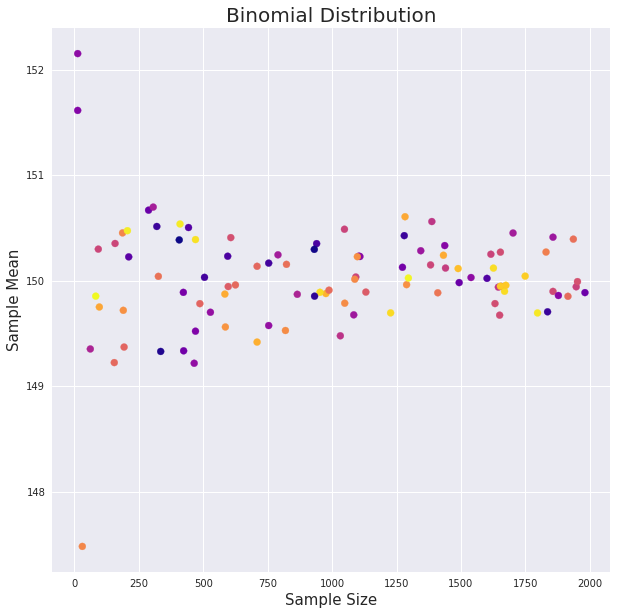

In [5]:
binomial_means = np.zeros(shape=(100,))

for i in range(len(dist_size)):
    sample_dist = np.random.binomial(mu*2, 0.5, size = dist_size[i])
    sample_mean = sample_dist.mean()
    binomial_means[i] = sample_mean


    
binomial_plot = pl.figure(figsize=(10,10)).add_subplot(111)
binomial_plot.scatter(dist_size, binomial_means, c = np.random.rand(100), cmap = 'plasma') 
binomial_plot.set_xlabel("Sample Size", fontsize = 15)
binomial_plot.set_ylabel("Sample Mean", fontsize = 15)
binomial_plot.set_title("Binomial Distribution", fontsize = 20)

# Figure 3

The scatter plot above shows the sample means for a binomial distribution. Similar to both the Normal and Poisson distributions, the sample means also trend towards 150 as the sample sizes increase. Using the binomial distribution, with probability of 0.5, there seems to be an equal distribution of means above and below the 150 value given. 

# Chi Square Distribution

Text(0.5,1,'Chi Square Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


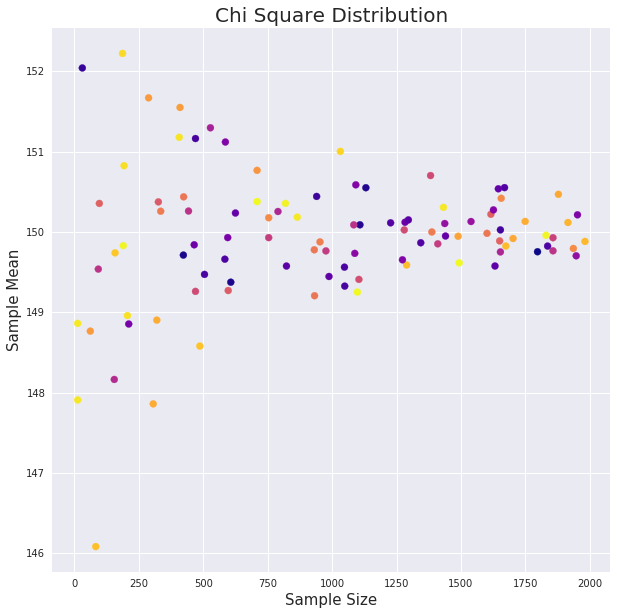

In [6]:
chisq_means = np.zeros(shape=(100,))

for i in range(len(dist_size)):
    sample_dist = np.random.chisquare(mu, size = dist_size[i])
    sample_mean = sample_dist.mean()
    chisq_means[i] = sample_mean


    
chisq_plot = pl.figure(figsize=(10,10)).add_subplot(111)
chisq_plot.scatter(dist_size, chisq_means, c = np.random.rand(100), cmap = 'plasma') 
chisq_plot.set_xlabel("Sample Size", fontsize = 15)
chisq_plot.set_ylabel("Sample Mean", fontsize = 15)
chisq_plot.set_title("Chi Square Distribution", fontsize = 20)

# Figure 4

The initial variance of sample means here, for smaller sample sizes, is much larger than any of the other distributions we have so far used. This can be attributed to the Chi Square Distribution. In this distribution, given a mean of *k*, the variance will be *2k*; this larger variance can be seen in the smaller sample sizes.

Following the law of large numbers and Central Limit Theorem, as the sample sizes increase, the sample means trend towards 150 again. 

# Laplace Distribution

Text(0.5,1,'Laplace Distribution')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


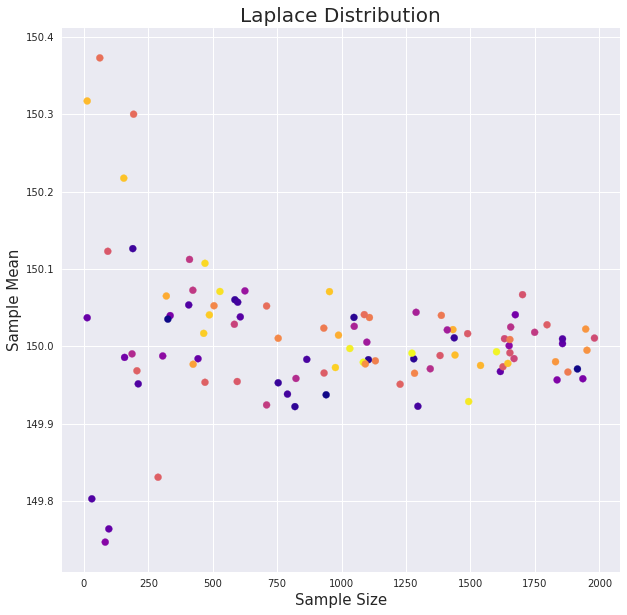

In [7]:
laplace_means = np.zeros(shape=(100,))

for i in range(len(dist_size)):
    sample_dist = np.random.laplace(mu, scale = 1, size = dist_size[i])
    sample_mean = sample_dist.mean()
    laplace_means[i] = sample_mean


    
laplace_plot = pl.figure(figsize=(10,10)).add_subplot(111)
laplace_plot.scatter(dist_size, laplace_means, c = np.random.rand(100), cmap = 'plasma')  
laplace_plot.set_xlabel("Sample Size", fontsize = 15)
laplace_plot.set_ylabel("Sample Mean", fontsize = 15)
laplace_plot.set_title("Laplace Distribution", fontsize = 20)

# Figure 5

Using the Laplace Distribution, this scatter plot exhibits the least variance in sample means compared to the 4 other plots above. This can be explained through the laplace distribution, given a scale of *b = 1*, the variance will be equal to *2b^2*. As such, the variance seen above will be low for all values of the sample size.

Although not as clear cut as the above distributions, this scatter plot also exhibits the law of large numbers. As the sample sizes increase, the sample means trend towards 150. 

(array([   1.,    0.,    0.,    0.,    0.,    1.,    1.,    0.,    2.,
           1.,    3.,    0.,    2.,    5.,    1.,   20.,   23.,   41.,
         216.,   95.,   40.,   23.,    8.,    4.,    5.,    1.,    3.,
           0.,    1.,    3.]),
 array([ 146.08340751,  146.29128018,  146.49915285,  146.70702552,
         146.91489819,  147.12277086,  147.33064353,  147.5385162 ,
         147.74638888,  147.95426155,  148.16213422,  148.37000689,
         148.57787956,  148.78575223,  148.9936249 ,  149.20149757,
         149.40937024,  149.61724291,  149.82511558,  150.03298825,
         150.24086092,  150.44873359,  150.65660626,  150.86447893,
         151.07235161,  151.28022428,  151.48809695,  151.69596962,
         151.90384229,  152.11171496,  152.31958763]),
 <a list of 30 Patch objects>)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


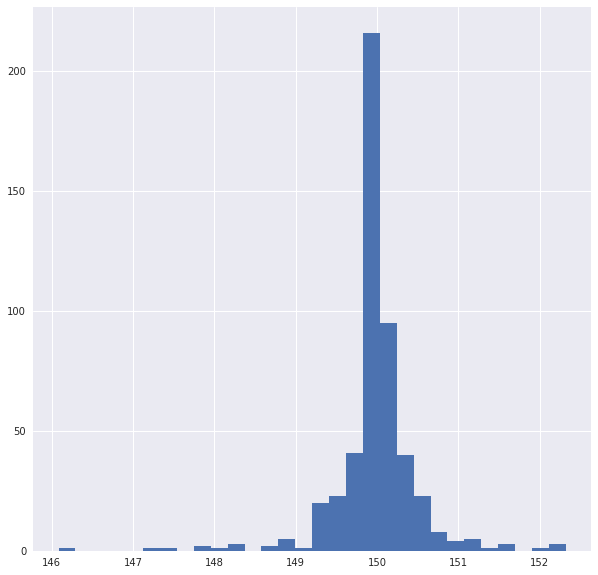

In [8]:
#Histogram

#Combine all mean lists and then plot
all_means = np.concatenate((normal_means, poisson_means, binomial_means, chisq_means, laplace_means), axis = None)

pl.figure(figsize=(10,10))
pl.hist(all_means, bins = 30)

# Figure 6

From the histogram, we can see that after 500 different sample sizes, the sample means exhibit a heavily centered distribution. Using the Central Limit Theorem, we can assume that as more sample distributions are run, the histogram will begin resembling a normal distribution.  